# Credit Card Detection

Neste projeto iremos realizar detecção de fraudes em cartões de crédito. Os dados podem ser obtidos no dataset do kaggle: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

# Importando dados e bibliotecas

## Importando principais bibliotecas e os dados

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Importando dados
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Variáveis
feature_names = list(dataset.columns)
n_features = len(feature_names)

# Nomes das variáveis
features_string = ""
for i in range(n_features):
  if (i+1)%5>0:
    features_string += feature_names[i] + '\t'
  else:
    features_string += feature_names[i] + '\n'
print(features_string)

Time	V1	V2	V3	V4
V5	V6	V7	V8	V9
V10	V11	V12	V13	V14
V15	V16	V17	V18	V19
V20	V21	V22	V23	V24
V25	V26	V27	V28	Amount
Class	


O conjunto de dados representa a descrição de transações de cartão de crédito.

As variáveis de V1 até V28 representam as componentes principais das transações, que neste caso são utilizadas para codificar dados sensíveis. Enquanto isso as variáveis Time e Amount representam o instante desde a primeira transação e a quantia requisitada na transação. 

Por fim a variável Class descreve se a transação correspondentes são fraude ou não.

# Verificando distribuição das variáveis

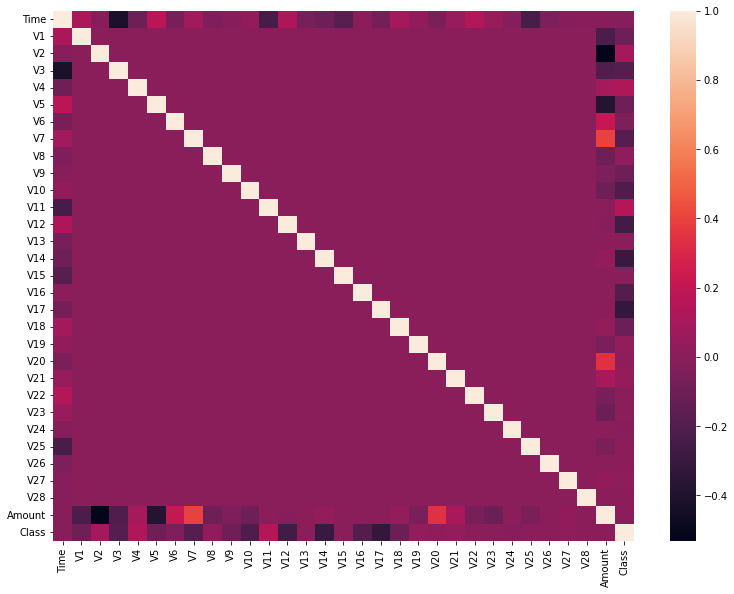

In [5]:
# Verificando as correlações
fig = plt.figure(figsize=(6.5*2,6.5*1.5))
fig.patch.set_alpha(1.0)
sns.heatmap(dataset.corr())
fig.savefig('figures/part1/correlation.pdf', bbox_inches='tight')
fig.savefig('figures/part1/correlation.png', bbox_inches='tight')
plt.show()

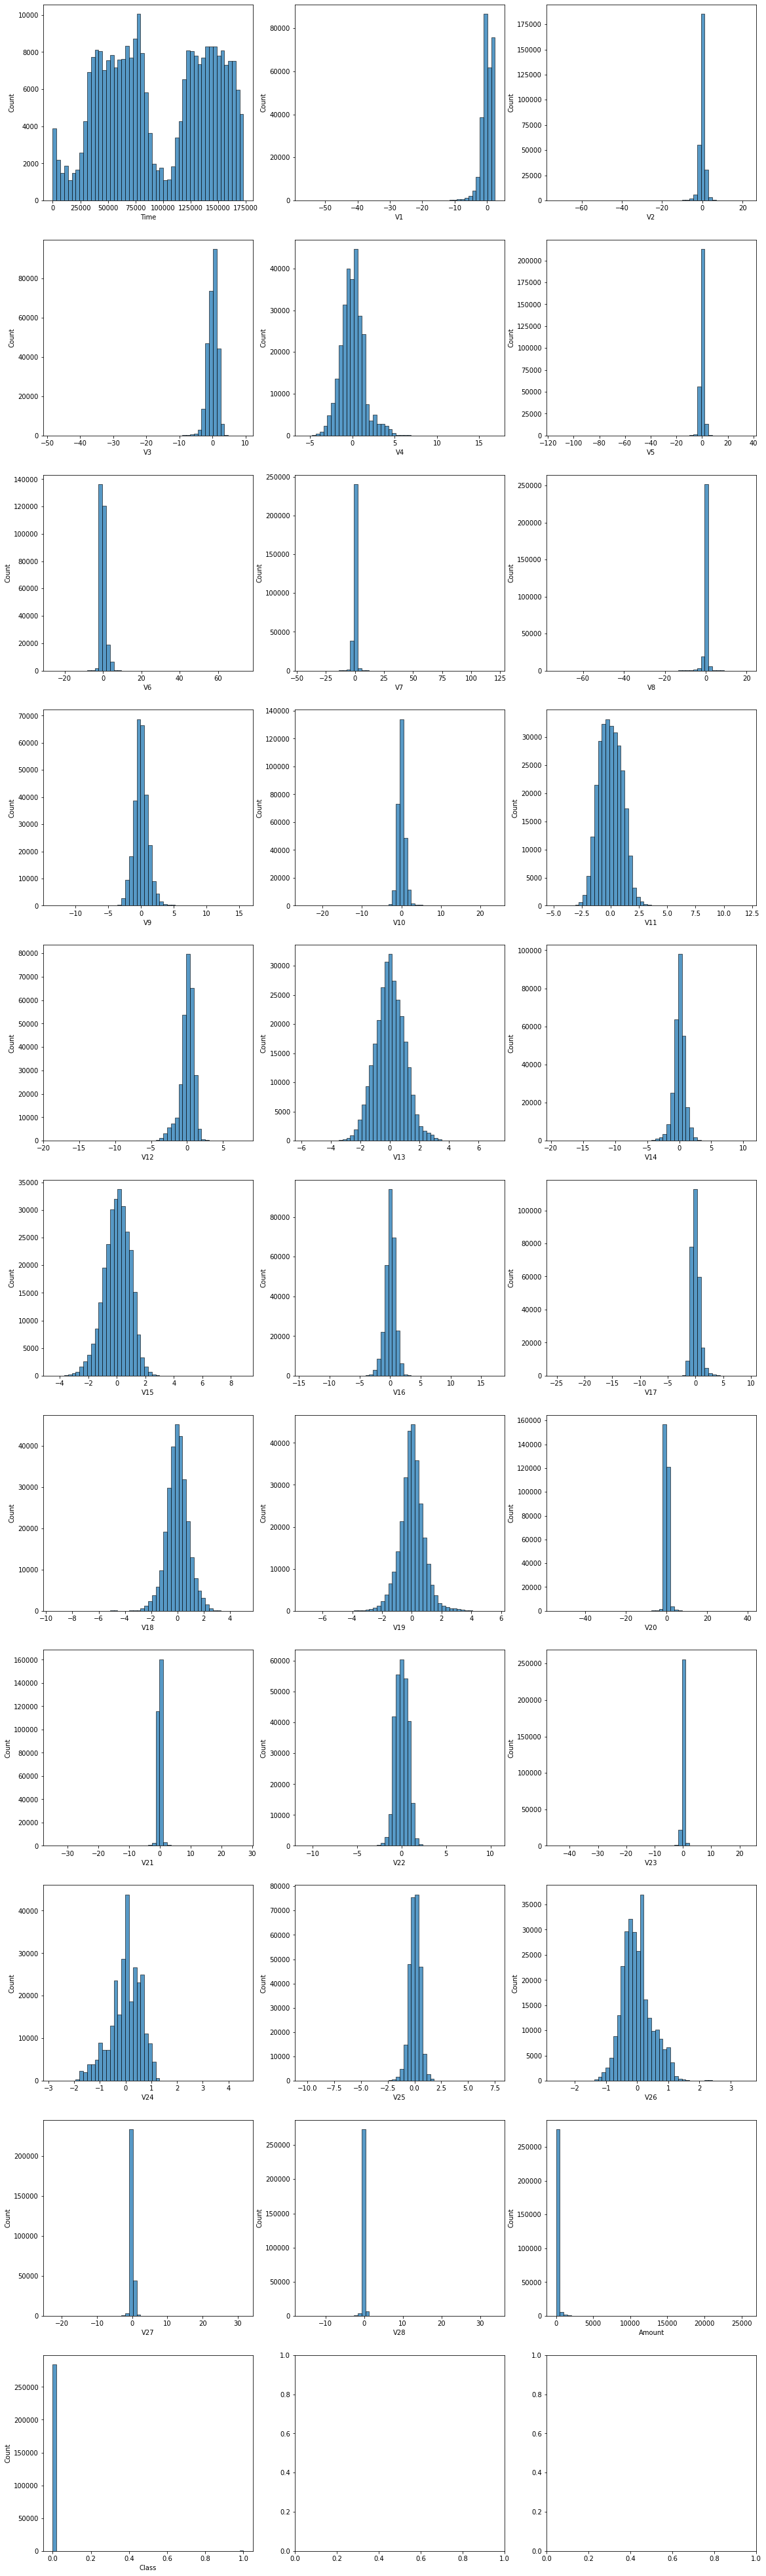

In [6]:
# Número de colunas e linhas para plotagem em grade
ncols = 3
nrows = ((n_features)//ncols) + 1 if (n_features)%ncols>0 else ((n_features)//ncols)


# Plotando histograma
fig,axes = plt.subplots(nrows=nrows,ncols=ncols)
fig.set_size_inches(6.5*ncols,6.5*nrows)

axes = axes.ravel()

for i in range(n_features):
    ax = axes[i]
    sns.histplot(data=dataset,x=feature_names[i],ax=ax,bins=50)

fig.patch.set_alpha(1.0)
fig.savefig('figures/part1/hist_table.pdf', bbox_inches='tight')
fig.savefig('figures/part1/hist_table.png', bbox_inches='tight')
plt.show()

Vemos uma distribuição quase normal nas variáveis V1 até V28, o que é esperado de uma decomposição em componentes principais.

Na variável Time não vemos uma distribuição bastante clara, mas aparentemente é relacionado com os ciclos diários, pois cada dia tem 86400 segundos, aproximadamente igual ao dos ciclos definidos pela distribuição das transações. Além disso, mantém uma quantidade quase uniforme de transações por intervalo durante grande parte do dia.

Na variável Amount vemos uma distribuição bastante concentrada em valores abaixo de 1000, porém com caudas longas de distribuição.


Vemos também um forte desbalanceamento entre as classes. Para resolver esse problema iremos realizar um rebalanceamento.

Além disso, o banco de dados possui entre 250.000 e 300.000. Nesse caso, um modelo de vizinhança provavelmente não será indicado. Outros modelos devem ter seu tamanho reduzido para facilitar o treinamento ou modelos que não utilizem todo o conjunto de dados simultaneamente.

Vamos ajustar o tempo em termos de hora do dia, em relação ao início da contagem do tempo e vamos verificar se há um padrão de horas em que há mais fraudes.

Também vamos verificar a quantidade de dinheiro realizada em fraudes.

In [7]:
dataset["Time"] = dataset["Time"].apply(lambda x:(x/3600)%24)

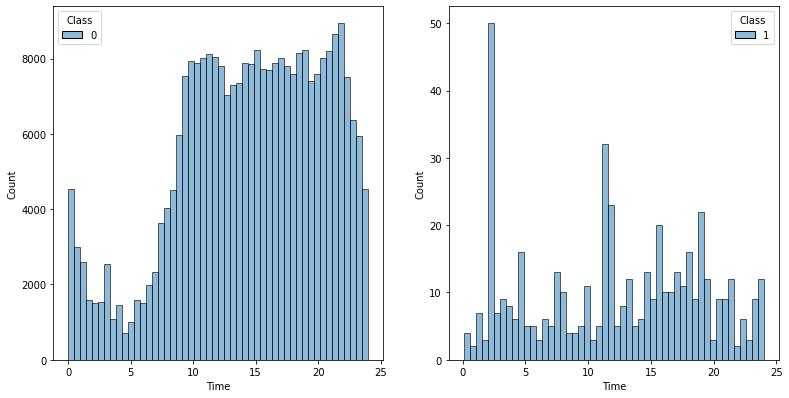

In [8]:
fig,axes = plt.subplots(1,2)
fig.set_size_inches(6.5*2,6.5*1)

axes = axes.ravel()

name = "Time"

ax = axes[0]
sns.histplot(data=dataset[dataset["Class"] == 0],x=name,hue="Class",ax=ax,bins=50)



ax = axes[1]
sns.histplot(data=dataset[dataset["Class"] == 1],x=name,hue="Class",ax=ax,bins=50)

fig.patch.set_alpha(1.0)
fig.savefig('figures/part1/time_hist.pdf', bbox_inches='tight')
fig.savefig('figures/part1/time_hist.png', bbox_inches='tight')
plt.show()

Vemos fraudes bastante distribuídas pelo dia, com picos por volta da segunda hora, que aparentemente é o horário com início da queda da atividade das transações. 

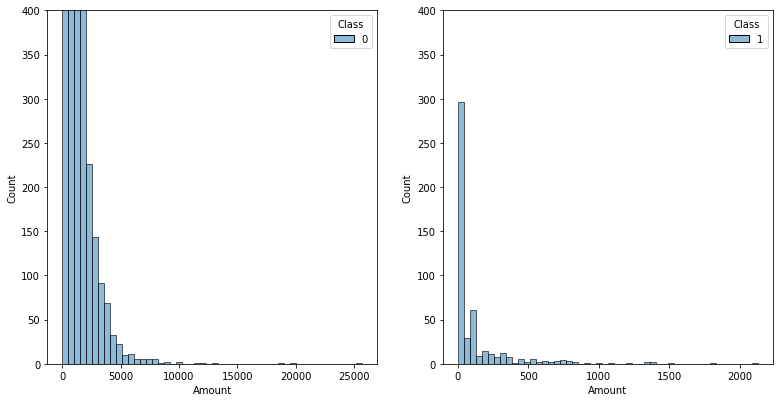

In [9]:
fig,axes = plt.subplots(1,2)
fig.set_size_inches(6.5*2,6.5*1)

axes = axes.ravel()

name = "Amount"

ax = axes[0]
sns.histplot(data=dataset[dataset["Class"] == 0],x=name,hue="Class",ax=ax,bins=50)
ax.set_ylim(0,400)


ax = axes[1]
sns.histplot(data=dataset[dataset["Class"] == 1],x=name,hue="Class",ax=ax,bins=50)
ax.set_ylim(0,400)
fig.patch.set_alpha(1.0)
fig.savefig('figures/part1/amount_hist.pdf', bbox_inches='tight')
fig.savefig('figures/part1/amount_hist.png', bbox_inches='tight')
plt.show()

O valor das transações fraudulentas em geral são abaixo de 500 e não ultrapassaram 3000. Por outro lado, as transações normais tem um limite maior, com no máximo 25000 e mais comum abaixo de 5000.

## Balanceando os dados e amostragem estratificada

Aqui realizamos uma amostragem estratificada através do método SMOTE e em seguida balanceamos as classes.

A divisão de treino, teste e validação foi de 60%, 20% e 20%, respectivamente.

Realizaremos a reamostragem somente da classe minoritária e além disso a amostragem dos dados de treino e validação serão treinados separadamente nos objetos ``sm_train`` e ``sm_val`` derivados da classe ``SMOTE`` do pacote ``imblearn.over_sampling``.

In [10]:
from imblearn.over_sampling import SMOTE



# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]



# Número de exemplos
n_examples = len(y)


# Separando os dados de não-fraude e os de fraude
# nf significa não-fraude
X_nf = X[y.reshape(-1) == 0,:]
y_nf = y[y.ravel() == 0]
n_examples_nf = len(y_nf)

# Embaralhando os dados
np.random.seed(43)
index_shuffling_nf = list(range(n_examples_nf))
np.random.shuffle(index_shuffling_nf)
np.random.seed(None)

X_nf,y_nf = X_nf[index_shuffling_nf,:],y_nf[index_shuffling_nf,:]


# Definindo os tamanhos dos dados de treino, teste e validação para não-fraude
# A divisão ficará 60%-20%-20%
train_size_nf = int(n_examples_nf*0.6)
val_size_nf = int(n_examples_nf*0.2)
test_size_nf = n_examples_nf - train_size_nf - val_size_nf


# Separando em dados de treino-teste-validação
X_nf_train,y_nf_train = X_nf[:train_size_nf],y_nf[:train_size_nf]
X_nf_val,y_nf_val = X_nf[train_size_nf:train_size_nf+val_size_nf],y_nf[train_size_nf:train_size_nf+val_size_nf]
X_nf_test,y_nf_test = X_nf[train_size_nf+val_size_nf:],y_nf[train_size_nf+val_size_nf:]




# Separando os dados de não-fraude e os de fraude
# f significa fraude
X_f = X[y.reshape(-1) == 1,:]
y_f = y[y.ravel() == 1]
n_examples_f = len(y_f)


# Embaralhando os dados
np.random.seed(42)
index_shuffling_f = list(range(n_examples_f))
np.random.shuffle(index_shuffling_f)
np.random.seed(None)

X_f,y_f = X_f[index_shuffling_f,:],y_f[index_shuffling_f,:]


# Definindo os tamanhos dos dados de treino, teste e validação para fraude
# A divisão ficará 0-50%-50%
train_size_f = 0
val_size_f = int(n_examples_f*0.5)
test_size_f = n_examples_f  - val_size_f


# Separando em dados de treino-teste-validação
X_f_val,y_f_val = X_f[train_size_f:train_size_f+val_size_f],y_f[train_size_f:train_size_f+val_size_f]
X_f_test,y_f_test = X_f[train_size_f+val_size_f:],y_f[train_size_f+val_size_f:]




# Concatenando os dados depois da divisão
X_train = X_nf_train
y_train = y_nf_train


X_val = np.concatenate((X_f_val,X_nf_val),axis=0)
y_val = np.concatenate((y_f_val,y_nf_val),axis=0)


X_test = np.concatenate((X_nf_test,X_f_test),axis=0)
y_test = np.concatenate((y_nf_test,y_f_test),axis=0)




# Rebalanceando os dados de treino e validação
sm_val = SMOTE(sampling_strategy='minority',random_state=42)


X_val,y_val = sm_val.fit_resample(X_val,y_val)

# Definindo os tamanhos de treino, teste e validação novamente
train_size = len(y_train)
val_size = len(y_val)
test_size = len(y_test)
n_examples = train_size + val_size + test_size 

# Embaralhando novamente os dados de treino e validação
np.random.seed(101)
index_shuffling_train = list(range(train_size))
np.random.shuffle(index_shuffling_train)
np.random.seed(None)

X_train,y_train = X_train[index_shuffling_train],y_train[index_shuffling_train]


np.random.seed(101)
index_shuffling_val = list(range(val_size))
np.random.shuffle(index_shuffling_val)
np.random.seed(None)

X_val,y_val = X_val[index_shuffling_val],y_val[index_shuffling_val]


# Testando Modelos de Aprendizagem Não-Supervisionada

Iremos testar modelos simples de apredizagem não-supervisionada, isso terá dois propósitos:

* Primeiramente estes métodos servirão como um benchmark (desempenho a ser melhorado).

* Segundo, a escolha de limiar (threshold) realizada nestes métodos pode ser utilizada também nos modelos de apredizado supervisionado.

## Testando K-Means

O objetivo do modelo K-Means é separar os dados que não são fraude em clusters e em seguida encontrar um limiar de corte para a distância até o centro do cluster, para detectar as anomalias. 

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Mudança de escala para facilitar o treinamento e tornar os dados mais estáveis
# No caso do KNN também ajuda na previsão de classes, visto variáveis diferentes provavelmente tem escalas diferentes
sc_X = MinMaxScaler()

# Aplicando scaling
X_train_sc = sc_X.fit_transform(X_train)
X_val_sc = sc_X.transform(X_val)
X_test_sc = sc_X.transform(X_test)

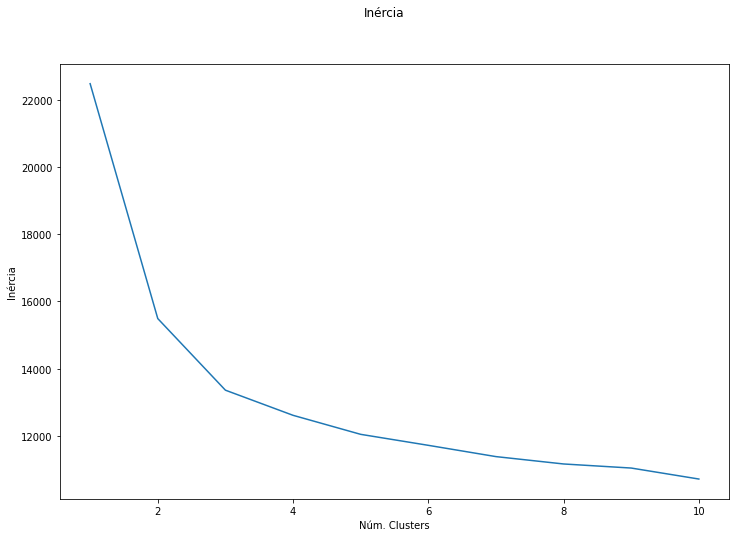

In [12]:
from sklearn.cluster import MiniBatchKMeans

# hiperparametros K-means
n_clusters_max=10
batch_size=10000
max_iter=300

# Within Cluster Squared Sum (WCSS)
wcss = np.zeros(n_clusters_max)
num_clusters = np.arange(1,n_clusters_max+1,dtype=int)
# número de clusters selecionados
for i,num_cluster in enumerate(num_clusters):
    kmeans_clusters = MiniBatchKMeans(n_clusters=num_cluster,init='k-means++',random_state=42,batch_size=batch_size,max_iter=max_iter)
    # Treinamento K-Means
    kmeans_clusters.fit(X_train_sc)
    wcss[i] = kmeans_clusters.inertia_

# Figuras de Inércia por número de clusters
fig = plt.figure(figsize=(12,8))
plt.plot(num_clusters,wcss)
plt.suptitle("Inércia")
plt.xlabel('Núm. Clusters')
plt.ylabel('Inércia')
fig.patch.set_alpha(1.0)
fig.savefig('figures/part1/elbow_kmeans.pdf', bbox_inches='tight')
fig.savefig('figures/part1/elbow_kmeans.png', bbox_inches='tight')
plt.show()

Utilizaremos ``n_clusters = 3``, ou seja, dois clusters para aplicar o método K-means, decidindo pelo método Elbow.

In [13]:
kmeans_clusters = MiniBatchKMeans(n_clusters=3,init='k-means++',random_state=42,batch_size=batch_size,max_iter=max_iter)
# Treinamento K-Means
kmeans_clusters.fit(X_train_sc)

MiniBatchKMeans(batch_size=10000, max_iter=300, n_clusters=3, random_state=42)

Função para calcular os quadrados das distâncias até o cluster mais próximo

In [14]:
def cluster_squared_distance(X):
    '''Calcula o quadrado das distâncias até o cluster mais próximo'''
    # Centro do Cluster
    c = kmeans_clusters.cluster_centers_
    # Cluster mais próximo
    clusters = kmeans_clusters.predict(X)
    # Calculando distâncias
    distances = np.linalg.norm(X-c[clusters],axis=1)**2
    return distances


val_prob = cluster_squared_distance(X_val_sc)

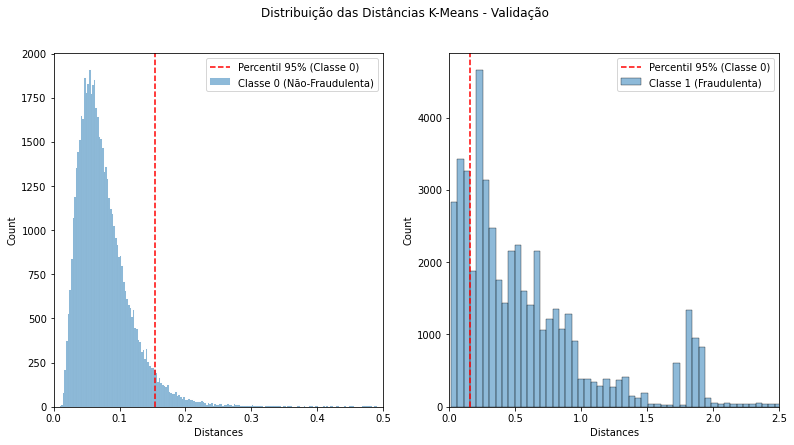

In [15]:
# Distâncias Até o Cluster mais próximo (Não-Fraude)
val_prob_nf = cluster_squared_distance(X_val_sc[y_val == 0,:])
data_nf = np.concatenate((val_prob_nf,np.zeros_like(val_prob_nf)))
data_nf = data_nf.reshape((-1,2),order="F")


# Distâncias Até o Cluster mais próximo (Fraude)
val_prob_f = cluster_squared_distance(X_val_sc[y_val == 1,:])
data_f = np.concatenate((val_prob_f,np.ones_like(val_prob_f)))
data_f = data_f.reshape((-1,2),order="F")


# Concatenando dados em um dataframe
data = pd.DataFrame(np.concatenate([data_nf,data_f]),columns=["Distances","Class"])


fig,axes = plt.subplots(1,2)
fig.set_size_inches(6.5*2,6.5*1)

axes = axes.ravel()

# Plotando distancias quadradas por classe
ax = axes[0]
sns.histplot(data=data[data["Class"] == 0], x="Distances", hue="Class", ax=ax, legend=False)
ax.axvline(data[data["Class"] == 0]["Distances"].quantile(0.95), c="r", ls="--")
ax.set_xlim([0,0.5])
ax.legend(labels=["Percentil 95% (Classe 0)","Classe 0 (Não-Fraudulenta)"])


ax = axes[1]
sns.histplot(data=data[data["Class"] == 1], x="Distances", hue="Class", ax=ax)
ax.axvline(data[data["Class"] == 0]["Distances"].quantile(0.95), c="r", ls="--")
ax.set_xlim([0,2.5])
ax.legend(labels=["Percentil 95% (Classe 0)","Classe 1 (Fraudulenta)"])


fig.suptitle("Distribuição das Distâncias K-Means - Validação")
fig.patch.set_alpha(1.0)
fig.savefig('figures/part1/distances_hist_kmeans.pdf', bbox_inches='tight')
fig.savefig('figures/part1/distances_hist_kmeans.png', bbox_inches='tight')
plt.show()

### Testando diferentes limiares (thresholds)

Definindo alguns testes e decidindo o melhor limiar (threshold) para prever as classes.

Referências: 

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

[Optimal Threshold for Imbalanced Classification](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)



#### G-Mean

O método G-Mean encontra a limiar maximizando a média geométrica entre a taxa de verdadeiros positivos e a taxa de verdadeiros negativos.

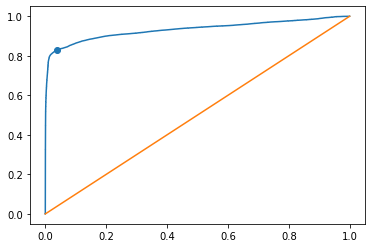

Best Threshold: 0.1620
Area Under the Curve: 0.9324


In [16]:
from sklearn.metrics import roc_curve

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Taxa de verdadeiros negativos = 1-fpr (1-(taxa de falsos positivos))
j_max = np.sqrt(tpr*(1-fpr)).argmax()
threshold = thresholds[j_max]

# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter((fpr[j_max]),tpr[j_max])
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [17]:
# Realizando as previsões para os dados de teste e validação
val_prob = cluster_squared_distance(X_val_sc)
y_val_pred_gmean = (val_prob>=threshold)


test_prob = cluster_squared_distance(X_test_sc)
y_test_pred_gmean = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.8950


,precision,recall,f1-score,support
0.0,0.849570,0.960027,0.901428,56863.00000
1.0,0.954053,0.830012,0.887721,56863.00000
accuracy,0.895020,0.895020,0.895020,0.89502
macro avg,0.901812,0.895020,0.894574,113726.00000
weighted avg,0.901812,0.895020,0.894574,113726.00000


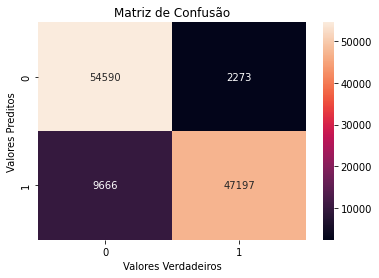

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# Utilizando as balanced accuracy, classification report e confusion matrix para verificar as precisão das previsões
print("**************Dados de Validação**************\n")

print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_gmean))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.9017


,precision,recall,f1-score,support
0.0,0.999287,0.961873,0.980223,56863.000000
1.0,0.087158,0.841463,0.157955,246.000000
accuracy,0.961355,0.961355,0.961355,0.961355
macro avg,0.543223,0.901668,0.569089,57109.000000
weighted avg,0.995358,0.961355,0.976682,57109.000000


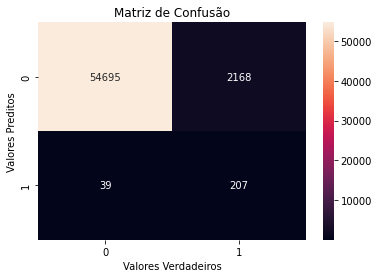

In [19]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_gmean))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### Balanced Accuracy

O método Balanced Accuracy encontra a limiar maximizando a quantidade Balanced Accuracy.

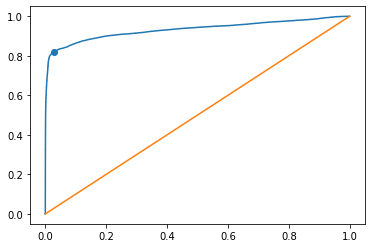

Best Threshold: 0.1758
Area Under the Curve: 0.9324


In [20]:
from sklearn.metrics import recall_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Neste caso vamos maximizar o Balanced Accuracy
balanced_accuracies = (tpr+(1-fpr))*0.5


# Encontrando o limiar com maior valor de Balanced Accuracy
j_max = balanced_accuracies.argmax()

threshold = thresholds[j_max]


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [21]:
# Realizando as previsões para o limiar encontrado
y_val_pred_bal_acc = (val_prob>=threshold)


y_test_pred_bal_acc = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.8957


,precision,recall,f1-score,support
0.0,0.843398,0.971933,0.903115,56863.000000
1.0,0.966886,0.819531,0.887131,56863.000000
accuracy,0.895732,0.895732,0.895732,0.895732
macro avg,0.905142,0.895732,0.895123,113726.000000
weighted avg,0.905142,0.895732,0.895123,113726.000000


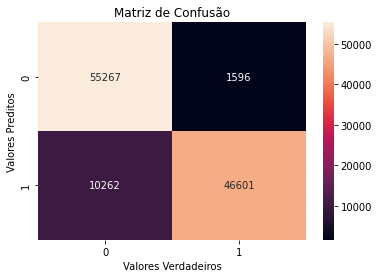

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_bal_acc))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_bal_acc,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.8988


,precision,recall,f1-score,support
0.0,0.999223,0.972425,0.985642,56863.000000
1.0,0.114625,0.825203,0.201289,246.000000
accuracy,0.971791,0.971791,0.971791,0.971791
macro avg,0.556924,0.898814,0.593465,57109.000000
weighted avg,0.995413,0.971791,0.982263,57109.000000


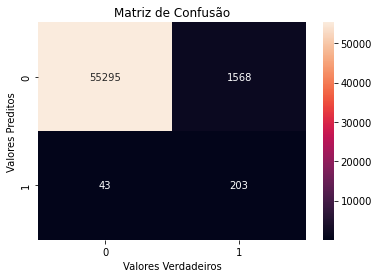

In [23]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_bal_acc))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_bal_acc,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

Aqui podemos notar que encontrar os parâmetros através do Balanced Accuracy aumenta levemente o número de fraudes erradas, porém balanceia com uma redução significativa das não-fraudes.

#### Percentil

Neste método calculamos o a percentil 95 das distâncias até o cluster nos dados de validação que não são fraude e predizemos como fraude os valores que se encontrar acima deste valor.

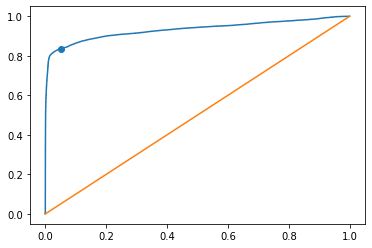

Best Threshold: 0.1536
Area Under the Curve: 0.9324


In [24]:
val_prob_nf = cluster_squared_distance(X_val_sc[y_val == 0,:])
data_nf = np.concatenate((val_prob_nf,np.zeros_like(val_prob_nf)))
data_nf = data_nf.reshape((-1,2),order="F")
val_prob_f = cluster_squared_distance(X_val_sc[y_val == 1,:])
data_f = np.concatenate((val_prob_f,np.ones_like(val_prob_f)))
data_f = data_f.reshape((-1,2),order="F")
data = pd.DataFrame(np.concatenate([data_nf,data_f]),columns=["Distances","Class"])

threshold = np.quantile(val_prob_nf,.95)


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [25]:
# Realizando as previsões para o limiar encontrado
val_prob = cluster_squared_distance(X_val_sc)
y_val_pred_percentile = (val_prob>=threshold)


test_prob = cluster_squared_distance(X_test_sc)
y_test_pred_percentile = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.8928


,precision,recall,f1-score,support
0.0,0.852492,0.949985,0.898602,56863.000000
1.0,0.943527,0.835622,0.886302,56863.000000
accuracy,0.892804,0.892804,0.892804,0.892804
macro avg,0.898009,0.892804,0.892452,113726.000000
weighted avg,0.898009,0.892804,0.892452,113726.000000


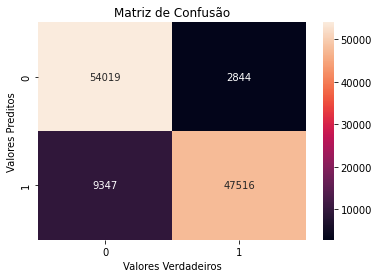

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_percentile))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_percentile,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.8989


,precision,recall,f1-score,support
0.0,0.999299,0.952218,0.975191,56863.000000
1.0,0.071111,0.845528,0.131189,246.000000
accuracy,0.951759,0.951759,0.951759,0.951759
macro avg,0.535205,0.898873,0.553190,57109.000000
weighted avg,0.995300,0.951759,0.971555,57109.000000


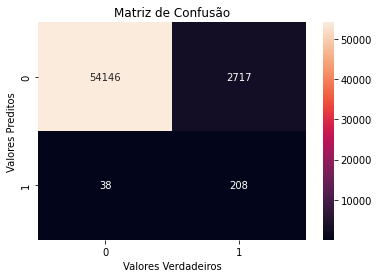

In [27]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_percentile))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_percentile,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

### Conclusões para K-Means

*************************   Dados de Teste   *************************


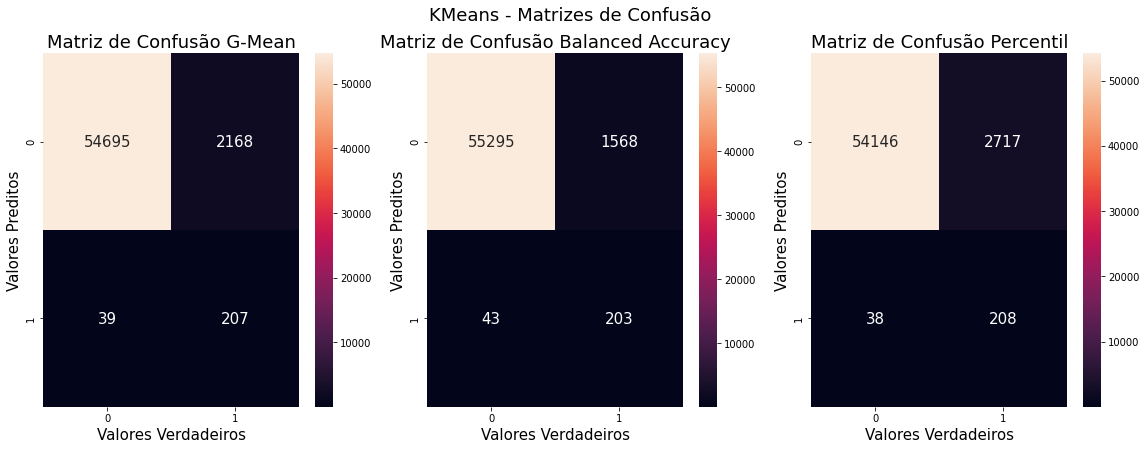

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import json

num_asterisk = 25
print("*"*num_asterisk + "   Dados de Teste   " + "*"*num_asterisk)


fig,axes = plt.subplots(1,3)
fig.set_size_inches(6.5*3,6.5*1)

# G-mean
ax = axes[0]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão G-Mean',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)




# Balanced Accuracy
ax = axes[1]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Balanced Accuracy',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)



# Percentil
ax = axes[2]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Percentil',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)

fig.suptitle("KMeans - Matrizes de Confusão",fontsize=18)


AUC_ROC = roc_auc_score(y_test,test_prob)


average_precision = average_precision_score(y_test,test_prob)




performance = {"AUC ROC":AUC_ROC,"Average Precision": average_precision,
                "Classification Report G-Mean":classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True),
                "Classification Report Balanced Accuracy":classification_report(y_test.reshape(-1),y_test_pred_bal_acc,digits=2,output_dict=True),
                "Classification Report Percentil":classification_report(y_test.reshape(-1),y_test_pred_percentile,digits=2,output_dict=True)}
with open("performance/performance_kmeans.json","w",encoding="utf-8") as f:
    json.dump(performance,f)


fig.patch.set_alpha(1.0)
fig.savefig('figures/part1/confusion_matrix_kmeans.pdf', bbox_inches='tight')
fig.savefig('figures/part1/confusion_matrix_kmeans.png', bbox_inches='tight')
plt.show()

Aparentemente a melhor métrica para avaliar o limiar é o Percentil ou o Balanced Accuracy, dependendo da perspectiva de negócio.

Na realidade o número de falsos positivos é bastante sensível ao limiar, para aumentar em uma unidade o número fraudes preditas corretamente (verdadeiros positivos), abrimos mão de muitas transações que serão avaliadas incorretamente. Ou seja, com o modelo utilizado, para evitar que uma transação a mais seja fraudada, eventualmente devemos bloquear diversas transações, nesse caso devemos ver qual é o melhor resultado.

## Testando IsolationForest

IsolationForest é um algoritmo que detecta outliers, que nesse caso iremos testar para verificar se esse algoritmo nos dá bons resultados na classificação de fraudes.

Para ter um treino mais rápido, foi utilizado um truque de treinamento de florestas aleatórias com ``warm_start`` para treinar separadamente diferentes amostras do conjunto de dados, acelerando o treinamento. 

Referências: 

[Documentação Oficial Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

[How to Fit Random Forests Faster](https://towardsdatascience.com/how-to-fit-random-forests-faster-a837de51d376)

Iremos selecionar o hiperparâmetro ``max_features`` calculando o melhor limiar com o percentil 95 dos scores da classe 0 e validando o melhor desempenho da métrica G-Mean.

In [29]:
from sklearn.ensemble import IsolationForest
from imblearn.metrics import geometric_mean_score

# n_splits é a subdivisão de dados para treinamento de uma parte da floresta aleatória
n_splits = 5

# Embaralhando dados
np.random.seed(101)
idx = np.array(range(len(X_train_sc)))
np.random.shuffle(idx)
splits = np.array_split(idx,n_splits)
np.random.seed(None)

# Hiperparâmetros
max_features = list(range(3,9))
Gmean = []
best_thresholds = []

for n_features in max_features:
  # IsolationForest com warm_start e treinamento de cada subdivisão (split) dos dados de treino
  clf = IsolationForest(n_estimators=0,max_features=n_features,warm_start=True,random_state=42,n_jobs=-1)
  
  # Treinando cada split
  for k,idx in enumerate(splits):
    # Definindo 100 árvores de decisão para cada split dos dados de treino
    clf.set_params(n_estimators=(k+1)*100)
    clf.fit(X_train_sc[idx])
  # Definindo o score de anomalia para os dados de validação
  val_prob = -clf.score_samples(X_val_sc)


  # Utilizando o o percentil 95 dos scores da classe 0 para encontrar o melhor limiar de cada hiperparâmetro
  threshold = np.quantile(val_prob[y_val==0],0.95)
  
  y_val_pred = (val_prob>=threshold)


  Gmean.append(geometric_mean_score(y_val,y_val_pred))
  best_thresholds.append(threshold)


  print('Max Features: %d,\t Threshold: %1.3f,\t G-Mean:%1.3f'%(n_features,threshold,Gmean[-1]))
j_max = np.argmax(Gmean)
max_feature = max_features[j_max]
print("best max_features G-Mean: %d"%max_feature)

Max Features: 3,	 Threshold: 0.491,	 G-Mean:0.897
Max Features: 4,	 Threshold: 0.488,	 G-Mean:0.898
Max Features: 5,	 Threshold: 0.490,	 G-Mean:0.899
Max Features: 6,	 Threshold: 0.486,	 G-Mean:0.899
Max Features: 7,	 Threshold: 0.484,	 G-Mean:0.899
Max Features: 8,	 Threshold: 0.487,	 G-Mean:0.900
best max_features G-Mean: 8


Utilizaremos ``max_features=8``, o maior valor obtido para G-Mean para o limiar gerado pelo método do percentil.

In [30]:
clf = IsolationForest(n_estimators=0,max_features=max_feature,warm_start=True,random_state=42,n_jobs=-1)

# Repetindo o procedimento que utilizamos para encontrar os melhores hiperparâmetros
n_splits = 5

np.random.seed(101)
idx = np.array(range(len(X_train_sc)))
np.random.shuffle(idx)
splits = np.array_split(idx,n_splits)
np.random.seed(None)



for k,idx in enumerate(splits):
    clf.set_params(n_estimators=(k+1)*100)
    clf.fit(X_train_sc[idx])

# Prevendo os scores de anomalia dos dados de validação e teste
val_prob = -clf.score_samples(X_val_sc)
test_prob = -clf.score_samples(X_test_sc)

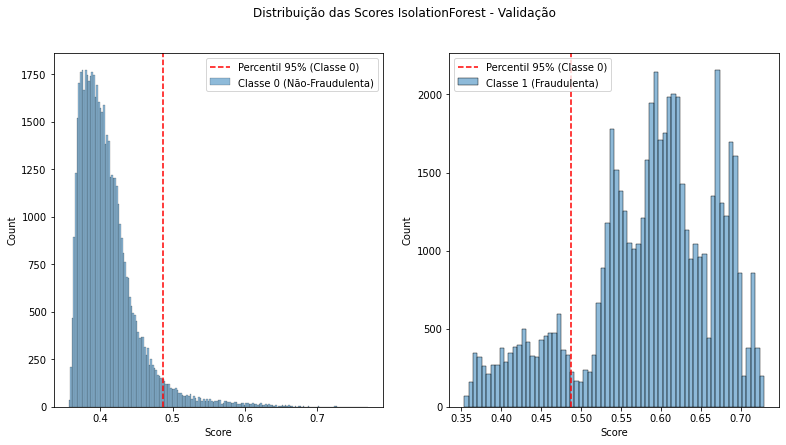

In [31]:
# Score (Não-Fraude)
val_prob_nf = val_prob[y_val == 0]
data_nf = np.concatenate((val_prob_nf,np.zeros_like(val_prob_nf)))
data_nf = data_nf.reshape((-1,2),order="F")


# Score (Fraude)
val_prob_f = val_prob[y_val == 1]
data_f = np.concatenate((val_prob_f,np.ones_like(val_prob_f)))
data_f = data_f.reshape((-1,2),order="F")


# Concatenando dados em um dataframe
data = pd.DataFrame(np.concatenate([data_nf,data_f]),columns=["Score","Class"])


fig,axes = plt.subplots(1,2)
fig.set_size_inches(6.5*2,6.5*1)

axes = axes.ravel()

# Plotando distancias quadradas por classe
ax = axes[0]
sns.histplot(data=data[data["Class"] == 0], x="Score", hue="Class", ax=ax, legend=False)
ax.axvline(data[data["Class"] == 0]["Score"].quantile(0.95), c="r", ls="--")
ax.legend(labels=["Percentil 95% (Classe 0)","Classe 0 (Não-Fraudulenta)"])


ax = axes[1]
sns.histplot(data=data[data["Class"] == 1], x="Score", hue="Class", ax=ax)
ax.axvline(data[data["Class"] == 0]["Score"].quantile(0.95), c="r", ls="--")
ax.legend(labels=["Percentil 95% (Classe 0)","Classe 1 (Fraudulenta)"])



fig.suptitle("Distribuição das Scores IsolationForest - Validação")
fig.patch.set_alpha(1.0)
fig.savefig('figures/part1/scores_hist_isolationforest.pdf', bbox_inches='tight')
fig.savefig('figures/part1/scores_hist_isolationforest.png', bbox_inches='tight')
plt.show()

### Testando diferentes limiares (thresholds)

Definindo alguns testes e decidindo o melhor limiar (threshold) para prever as classes.

Referências: 

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

[Optimal Threshold for Imbalanced Classification](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)



#### G-Mean

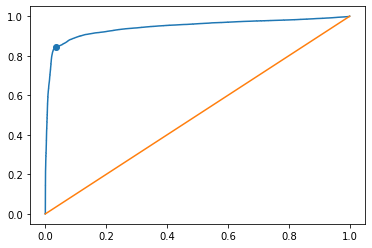

Best Threshold: 0.5046
Area Under the Curve: 0.9447


In [32]:
from sklearn.metrics import roc_curve

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Taxa de verdadeiros negativos = 1-fpr (1-(taxa de falsos positivos))
j_max = np.sqrt(tpr*(1-fpr)).argmax()
threshold = thresholds[j_max]

# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter((fpr[j_max]),tpr[j_max])
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [33]:
y_val_pred_gmean = (val_prob>=threshold)


y_test_pred_gmean = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.9040


,precision,recall,f1-score,support
0.0,0.859826,0.965461,0.909586,56863.000000
1.0,0.960623,0.842604,0.897752,56863.000000
accuracy,0.904032,0.904032,0.904032,0.904032
macro avg,0.910224,0.904032,0.903669,113726.000000
weighted avg,0.910224,0.904032,0.903669,113726.000000


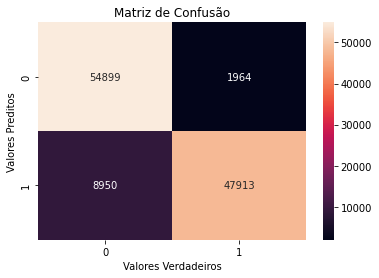

In [34]:
# Utilizando as métricas balanced accuracy, classification report e confusion matrix para verificar as precisão das previsões
print("**************Dados de Validação**************\n")

print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_gmean))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.8992


,precision,recall,f1-score,support
0.0,0.999253,0.965021,0.981839,56863.000000
1.0,0.093437,0.833333,0.168033,246.000000
accuracy,0.964454,0.964454,0.964454,0.964454
macro avg,0.546345,0.899177,0.574936,57109.000000
weighted avg,0.995352,0.964454,0.978333,57109.000000


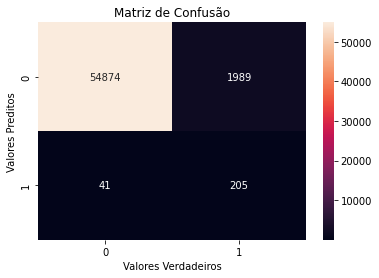

In [35]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_gmean))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### Balanced Accuracy

O método Balanced Accuracy encontra a limiar maximizando a quantidade Balanced Accuracy.

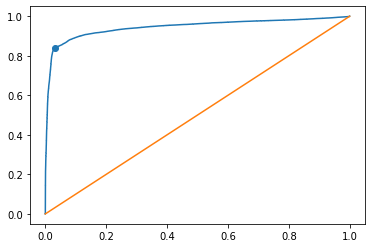

Best Threshold: 0.5061
Area Under the Curve: 0.9447


In [36]:
from sklearn.metrics import recall_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Neste caso vamos maximizar o Balanced Accuracy
balanced_accuracies = (tpr+(1-fpr))*0.5


# Encontrando o limiar com maior valor de Balanced Accuracy
j_max = balanced_accuracies.argmax()

threshold = thresholds[j_max]


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [37]:
y_val_pred_bal_acc = (val_prob>=threshold)


y_test_pred_bal_acc = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.9040


,precision,recall,f1-score,support
0.0,0.859162,0.966498,0.909675,56863.000000
1.0,0.961715,0.841567,0.897638,56863.000000
accuracy,0.904032,0.904032,0.904032,0.904032
macro avg,0.910439,0.904032,0.903657,113726.000000
weighted avg,0.910439,0.904032,0.903657,113726.000000


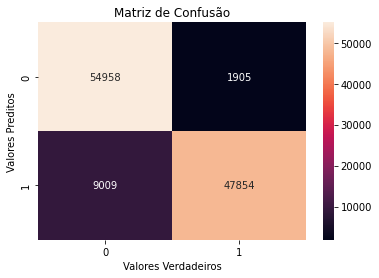

In [38]:
# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_bal_acc))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_bal_acc,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.8996


,precision,recall,f1-score,support
0.0,0.999254,0.965918,0.982303,56863.000000
1.0,0.095660,0.833333,0.171620,246.000000
accuracy,0.965347,0.965347,0.965347,0.965347
macro avg,0.547457,0.899626,0.576962,57109.000000
weighted avg,0.995362,0.965347,0.978811,57109.000000


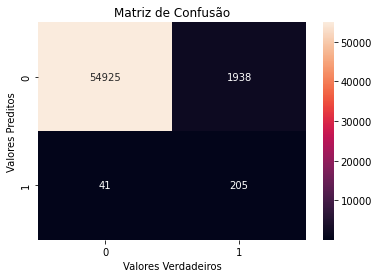

In [39]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_bal_acc))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_bal_acc,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### Percentil

Neste método calculamos o a percentil 95 das distâncias até o cluster nos dados de validação que não são fraude e predizemos como fraude os valores que se encontrar acima deste valor.

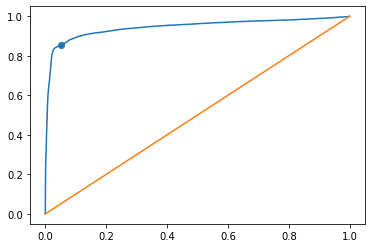

Best Threshold: 0.4869
Area Under the Curve: 0.9447


In [40]:
# Prevendo os scores de anomalia dos dados de validação (não fraudes)
val_prob_nf = -clf.score_samples(X_val_sc[y_val==0,:])

threshold = np.quantile(val_prob_nf,.95)


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [41]:
# Realizando as previsões para o limiar encontrado
y_val_pred_percentile = (val_prob>=threshold)


y_test_pred_percentile = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.9014


,precision,recall,f1-score,support
0.0,0.865814,0.949985,0.905949,56863.000000
1.0,0.944599,0.852769,0.896338,56863.000000
accuracy,0.901377,0.901377,0.901377,0.901377
macro avg,0.905207,0.901377,0.901143,113726.000000
weighted avg,0.905207,0.901377,0.901143,113726.000000


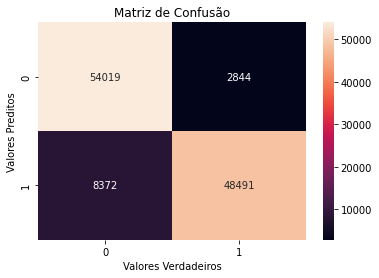

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_percentile))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_percentile,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.9017


,precision,recall,f1-score,support
0.0,0.999334,0.949739,0.973905,56863.000000
1.0,0.068449,0.853659,0.126735,246.000000
accuracy,0.949325,0.949325,0.949325,0.949325
macro avg,0.533891,0.901699,0.550320,57109.000000
weighted avg,0.995324,0.949325,0.970256,57109.000000


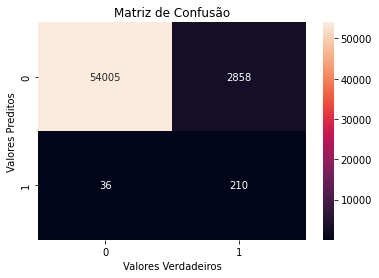

In [43]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_percentile))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_percentile,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

### Conclusões para IsolationForest

*************************   Dados de Teste   *************************


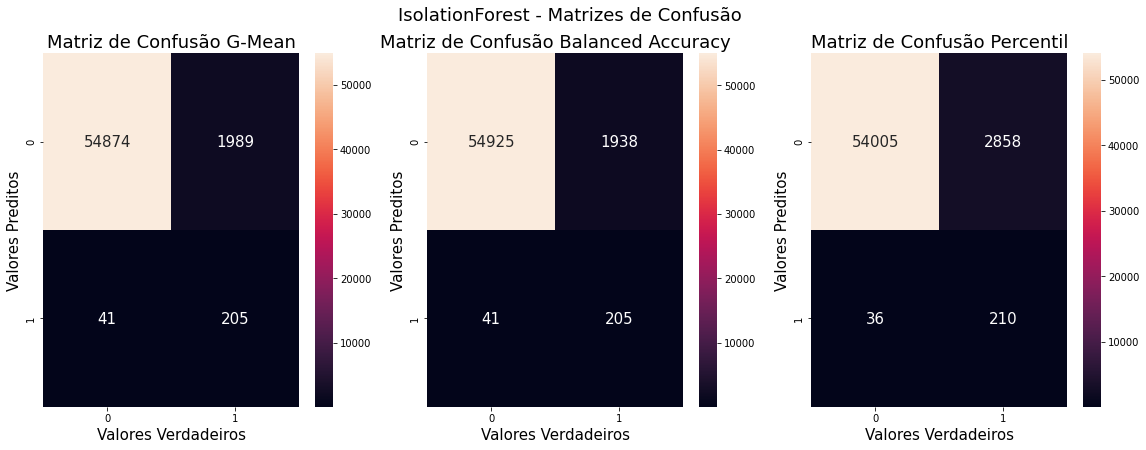

In [44]:
num_asterisk = 25
print("*"*num_asterisk + "   Dados de Teste   " + "*"*num_asterisk)


fig,axes = plt.subplots(1,3)
fig.set_size_inches(6.5*3,6.5*1)

# G-mean
ax = axes[0]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão G-Mean',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)




# Balanced Accuracy
ax = axes[1]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Balanced Accuracy',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)




# Percentil
ax = axes[2]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Percentil',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)

fig.suptitle("IsolationForest - Matrizes de Confusão",fontsize=18)

AUC_ROC = roc_auc_score(y_test,test_prob)


average_precision = average_precision_score(y_test,test_prob)


performance = {"AUC ROC":AUC_ROC,"Average Precision": average_precision,
                "Classification Report G-Mean":classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True),
                "Classification Report Balanced Accuracy":classification_report(y_test.reshape(-1),y_test_pred_bal_acc,digits=2,output_dict=True),
                "Classification Report Percentil":classification_report(y_test.reshape(-1),y_test_pred_percentile,digits=2,output_dict=True)}
with open("performance/performance_isolationforest.json","w",encoding="utf-8") as f:
    json.dump(performance,f)


fig.patch.set_alpha(1.0)
fig.savefig('figures/part1/confusion_matrix_isolationforest.pdf', bbox_inches='tight')
fig.savefig('figures/part1/confusion_matrix_isolationforest.png', bbox_inches='tight')
plt.show()

Os resultados foram similares ao do método K-Means, servindo como baseline para os próximos testes.

O principal ponto aqui é o peso que cada fraude classificada incorretamente e cada transação não-fraudulenta classificada incorretamente tem. Isso é devido às pequenas diferenças entre o número fraudes classificadas incorretamente, mas uma diferença muito grande na classificações imprecisas em exemplos da classe não-fraudulenta.

# Conclusão

Nesta primeira parte da análise nós utilizamos alguns métodos básicos de aprendizagem não-supervisionada, com o intuito de iniciar por modelos simples e fáceis de calibrar.

Na próxima parte iremos utilizar alguns métodos de aprendizagem supervisionada para avaliar se há uma vantagem competitiva de um tipo aprendizagem ou outro, para este problema especificamente.